### Density Estimation of Income Risks

- Following Manski et al.(2009)
- Three cases 
   - case 1. 3+ intervales with positive probabilities, to be fitted with a generalized beta distribution
   - case 2. exactly 2 adjacent intervals with positive probabilities, to be fitted with a triangle distribution 
   - case 3. one interval only, to be fitted with a uniform distribution

In [4]:
from scipy.stats import gamma
from scipy.stats import beta 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd

In [5]:
from DensityEst import SynDensityStat 

In [6]:
### loading probabilistic data  
IndSCE=pd.read_stata('../SurveyData/SCE/IncExpSCEProbIndM.dta')   
# monthly income growth 

In [7]:
IndSCE.head()

,date,year,month,userid,tenure,weight,Q1,Q2,Q3,Q4new,...,Q24_varp5,Q24_varp95,Q24_sd,Q24_disg,Q24_meanp75,Q24_meanp25,Q24_meanp50,Q24_varp75,Q24_varp25,Q24_varp50
0,2013-06-01,2013,6,70000220,6,16.327999,3.0,3.0,50.0,20.0,...,0.276494,56.333328,2.265121,5.130771,3.196597,1.0,2.207496,4.174127,0.333333,1.137786
1,2013-06-01,2013,6,70000224,7,0.228000,4.0,4.0,25.0,10.0,...,0.276494,56.333328,2.265121,5.130771,3.196597,1.0,2.207496,4.174127,0.333333,1.137786
2,2013-06-01,2013,6,70000234,6,4.066000,4.0,3.0,3.0,9.0,...,0.276494,56.333328,2.265121,5.130771,3.196597,1.0,2.207496,4.174127,0.333333,1.137786
3,2013-06-01,2013,6,70000238,6,3.035000,3.0,3.0,0.0,10.0,...,0.276494,56.333328,2.265121,5.130771,3.196597,1.0,2.207496,4.174127,0.333333,1.137786
4,2013-07-01,2013,7,70000238,7,1.867000,3.0,3.0,50.0,90.0,...,0.276494,56.333328,2.182738,4.764343,3.046669,1.0,2.000000,3.433073,0.333333,0.813287


In [8]:
## how many observations?
len(IndSCE)

79064

In [9]:
## how many observations have density forecasts
len(IndSCE['Q24_bin10'].dropna())

52820

In [16]:
IndSCE['Q24_bin3'].dropna()

2          0.0
7         20.0
8         80.0
9          0.0
10         0.0
14         5.0
15        70.0
16        58.0
17        60.0
18        70.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34         0.0
35       100.0
36         0.0
37        50.0
38        10.0
39        10.0
55        20.0
61         0.0
62         0.0
         ...  
79020      0.0
79021      0.0
79022      0.0
79023     20.0
79025     10.0
79026      8.0
79027     20.0
79028      0.0
79029     70.0
79030     80.0
79031      0.0
79033      8.0
79034     50.0
79036      2.0
79037     16.0
79045      0.0
79046      0.0
79047     60.0
79048      0.0
79049     20.0
79050      5.0
79051      0.0
79052      0.0
79053     45.0
79056      0.0
79057      8.0
79059     20.0
79060      0.0
79062     10.0
79063      0.0
Name: Q24_bin3, Length: 52860, dtype: float64

In [10]:
## survey-specific parameters 
nobs=len(IndSCE)
SCE_bins=np.array([-20,-12,-8,-4,-2,0,2,4,8,12,20])
print("There are "+str(len(SCE_bins)-1)+" bins in SCE")

There are 10 bins in SCE


In [19]:
##############################################
### attention: the estimation happens here!!!!!
###################################################


## creating positions 
index  = IndSCE.index
columns=['IncMean','IncVar']
IndSCE_moment_est = pd.DataFrame(index=index,
                                 columns=columns)

## Invoking the estimation
for i in range(nobs):
    print(i)
    ## take the probabilities (flip to the right order, normalized to 0-1)
    Inc = np.flip(np.array([IndSCE.iloc[i,:]['Q24_bin'+str(n)]/100 for n in range(1,11)]))
    print(Inc)
    if not np.isnan(Inc).any():
        stats_est = SynDensityStat(SCE_bins,Inc)
        if len(stats_est)>0:
            IndSCE_moment_est['IncMean'][i] = stats_est['mean']
            print(stats_est['mean'])
            IndSCE_moment_est['IncVar'][i] = stats_est['variance']
            print(stats_est['variance'])

0
[nan nan nan nan nan nan nan nan nan nan]
1
[nan nan nan nan nan nan nan nan nan nan]
2
[0.   0.   0.   0.05 0.1  0.85 0.   0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -4
upper bound is 2
2 parameters
0.8693898693418827
0.0476335800990423
3
[nan nan nan nan nan nan nan nan nan nan]
4
[nan nan nan nan nan nan nan nan nan nan]
5
[nan nan nan nan nan nan nan nan nan nan]
6
[nan nan nan nan nan nan nan nan nan nan]
7
[0.  0.  0.  0.  0.  0.  0.8 0.2 0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
3.8090169943749475
0.5454237476562285
8
[0.  0.  0.2 0.  0.  0.  0.  0.8 0.  0. ]
probs sum up to 1
[]
[]
9
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
10
[0.   0.   0.   0.   0.   0.95 0.05 0.   0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and no

2 parameters
0.40769167597198414
0.02975160985735859
80
[0.   0.   0.   0.   0.   0.   0.05 0.5  0.2  0.25]
probs sum up to 1
at least three bins with positive probs
lower bound is 2
upper bound is 20
2 parameters
0.36479231337075996
0.04286383732774951
81
[0.   0.   0.   0.   0.   0.15 0.35 0.35 0.15 0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 12
2 parameters
0.3814107653966683
0.047067469204494734
82
[0.  0.  0.  0.  0.  0.2 0.4 0.4 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.4465586173143865
0.04352058624064613
83
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
84
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8090169943749475
0.54542374

2 parameters
0.1660595749104077
0.00295544617837066
159
[0.  0.  0.  0.  0.  0.4 0.5 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3021921754119107
0.020538069854670653
160
[0.   0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 8
2 parameters
0.4027812739869963
0.014713071830340433
161
[0.  0.  0.  0.  0.  0.1 0.8 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3725886847273669
0.009273767491809727
162
[0.   0.   0.   0.   0.1  0.2  0.2  0.25 0.2  0.05]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 20
2 parameters
0.3099754928755021
0.035583048788601315
163
[nan nan nan nan nan nan nan nan nan nan]
164
[nan nan nan nan nan nan nan nan nan nan]
165
[nan nan nan nan nan nan nan nan nan nan]
166
[0.   0.   0.05 0.0

2 parameters
0.4999963755462454
0.04692366476605981
227
[0.   0.   0.   0.   0.25 0.25 0.5  0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.6061017235952004
0.10062068393217855
228
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.4999963755462454
0.04692366476605981
229
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
230
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
231
[0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.95]
probs sum up to 1
[]
[]
232
[0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.8]
probs sum up to 1
[]
[]
233
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. 

2 parameters
-2.3277463220045065
-0.032008968031355126
300
[nan nan nan nan nan nan nan nan nan nan]
301
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
302
[nan nan nan nan nan nan nan nan nan nan]
303
[nan nan nan nan nan nan nan nan nan nan]
304
[nan nan nan nan nan nan nan nan nan nan]
305
[nan nan nan nan nan nan nan nan nan nan]
306
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
307
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
308
[0.   0.   0.   0.   0.   0.   0.99 0.01 0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
3.111111111111111
0.2057613168724281
309
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two in

2 parameters
0.8311334667957248
0.07639111415698822
391
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
392
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
393
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.49997967141229693
0.016198196210665577
394
[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
probs sum up to 1
[]
[]
395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
probs sum up to 1
Only one interval with positive probs
{'lb': 12, 'ub': 20}
16.0
5.333333333333333
396
[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
8.0
2.6666666666666665
397
[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
probs sum up to 1

2 parameters
0.4965469666603244
0.05057520933246478
464
[0.  0.  0.  0.  0.  0.1 0.2 0.5 0.2 0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 12
2 parameters
0.46468760922528174
0.047235515079733864
465
[0.   0.   0.   0.   0.   0.   0.25 0.5  0.25 0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 2
upper bound is 12
2 parameters
0.4092615177556013
0.062008860790767895
466
[0.  0.  0.  0.  0.  0.3 0.2 0.4 0.1 0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 12
2 parameters
0.34836836061971044
0.055866693455083744
467
[0.  0.  0.  0.  0.  0.1 0.  0.4 0.5 0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 12
2 parameters
0.637809585089975
0.05888330315208975
468
[0.   0.   0.   0.   0.   0.35 0.65 0.   0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.55137

2 parameters
0.41807519908523183
0.03283112306150529
554
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
555
[0.   0.   0.   0.   0.25 0.35 0.1  0.3  0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 8
2 parameters
0.4014662712464478
0.06987830728487765
556
[0.   0.   0.   0.   0.   0.15 0.25 0.25 0.35 0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 12
2 parameters
0.4916365467469973
0.08900820269383677
557
[nan nan nan nan nan nan nan nan nan nan]
558
[nan nan nan nan nan nan nan nan nan nan]
559
[nan nan nan nan nan nan nan nan nan nan]
560
[nan nan nan nan nan nan nan nan nan nan]
561
[nan nan nan nan nan nan nan nan nan nan]
562
[0.   0.   0.   0.   0.   0.   0.06 0.5  0.4  0.04]
probs sum up to 1
at least three bins with positive probs
lower bound is 2
upper bound is 20
2 parameters
0.319680350581283
0

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
622
[0.   0.   0.   0.   0.   0.04 0.95 0.01 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.35367026496564163
0.003751075523735634
623
[0.  0.  0.  0.  0.  0.8 0.1 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.13741118447368117
0.051661137020621875
624
[0.  0.  0.  0.  0.  0.8 0.1 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.13741118447368117
0.051661137020621875
625
[0.  0.  0.  0.  0.  0.8 0.1 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.13741118447368117
0.051661137020621875
626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
probs sum up to 1
Only one interval with positive probs


2 parameters
0.49997967141229693
0.016198196210665577
677
[nan nan nan nan nan nan nan nan nan nan]
678
[nan nan nan nan nan nan nan nan nan nan]
679
[nan nan nan nan nan nan nan nan nan nan]
680
[nan nan nan nan nan nan nan nan nan nan]
681
[nan nan nan nan nan nan nan nan nan nan]
682
[nan nan nan nan nan nan nan nan nan nan]
683
[nan nan nan nan nan nan nan nan nan nan]
684
[nan nan nan nan nan nan nan nan nan nan]
685
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
686
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
687
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
688
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
689
[0.  0.  0.  0.  0.  0.1 0.9 0.  0.  0

2 parameters
0.4999963755462454
0.04692366476605981
759
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
760
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
761
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -2, 'ub': 0}
-1.0
0.3333333333333333
762
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
763
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
764
[nan nan nan nan nan nan nan nan nan nan]
765
[nan nan nan nan nan nan nan nan nan nan]
766
[nan nan nan nan nan nan nan nan nan nan]
767
[nan nan nan nan nan nan nan nan nan nan]
768
[nan nan nan nan nan nan nan nan nan nan]
769


2 parameters
0.1981235740963098
0.020337385160755925
826
[0.   0.   0.   0.   0.   0.2  0.4  0.15 0.15 0.1 ]
[]
[]
827
[0.   0.   0.   0.   0.   0.05 0.5  0.25 0.15 0.05]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.2388948153163453
0.018381926017596622
828
[0.   0.   0.   0.   0.   0.2  0.4  0.15 0.15 0.1 ]
[]
[]
829
[0.   0.   0.   0.   0.   0.15 0.3  0.3  0.15 0.1 ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.27852612698722246
0.0354226193185992
830
[0.   0.   0.   0.   0.   0.1  0.1  0.15 0.25 0.4 ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.5132909112895706
0.08308221984792484
831
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
832
[0.   0.   0.   0.02 0.05 0.3  0.1  0.1

2 parameters
0.4180198951164061
0.005175456018056895
886
[nan nan nan nan nan nan nan nan nan nan]
887
[nan nan nan nan nan nan nan nan nan nan]
888
[0.  0.  0.  0.  0.  0.1 0.6 0.3 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.4271069263558599
0.018795021405862554
889
[0.  0.  0.  0.  0.  0.3 0.1 0.6 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.4549933551514387
-9.546850018827696e-05
890
[0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
4.0
2.6666666666666665
891
[0.   0.   0.   0.   0.   0.05 0.15 0.25 0.45 0.1 ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.40159581033051883
0.03449632645093729
892
[0.  0.  0.  0.  0.  0.  0.  0.1 0.9 0. ]
probs sum up to 1
There are two bins 

[nan nan nan nan nan nan nan nan nan nan]
958
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
959
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
960
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
961
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8090169943749475
0.5454237476562283
962
[0.  0.  0.  0.  0.  0.  0.  0.8 0.1 0.1]
probs sum up to 1
at least three bins with positive probs
lower bound is 4
upper bound is 20
2 parameters
0.13741118447368117
0.051661137020621875
963
[nan nan nan nan nan nan nan nan nan nan]
964
[nan nan nan nan nan nan nan nan nan nan]
965
[nan nan nan nan nan nan nan nan n

[0.   0.   0.   0.   0.   0.19 0.4  0.35 0.05 0.01]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.19353122974783732
0.01105042468796743
1030
[0.   0.   0.   0.   0.   0.08 0.4  0.4  0.1  0.02]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.23064039046420035
0.013339558275893344
1031
[0.  0.  0.  0.  0.  0.9 0.1 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.4624752955742644
0.35647233169417203
1032
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8090169943749475
0.5454237476562283
1033
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
1034
[0.  0.  0.  0.  0.  0.9 0.1 0.  0.  0. ]
probs sum up to 1
There are two

2 parameters
0.46604885466652757
0.04583547859463797
1087
[nan nan nan nan nan nan nan nan nan nan]
1088
[0.   0.05 0.05 0.1  0.1  0.2  0.2  0.2  0.05 0.05]
probs sum up to 1
at least three bins with positive probs
lower bound is -12
upper bound is 20
2 parameters
0.4392252570066358
0.018913649210768633
1089
[0.05 0.05 0.1  0.1  0.1  0.1  0.2  0.1  0.1  0.1 ]
[]
[]
1090
[0.   0.05 0.05 0.05 0.05 0.4  0.4  0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -12
upper bound is 4
2 parameters
0.8157859128782101
0.02165399875711494
1091
[0.05 0.05 0.05 0.05 0.05 0.3  0.15 0.1  0.1  0.1 ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 20
4 parameters
0.6666666666666666
0.05555555555555555
1092
[nan nan nan nan nan nan nan nan nan nan]
1093
[nan nan nan nan nan nan nan nan nan nan]
1094
[nan nan nan nan nan nan nan nan nan nan]
1095
[nan nan nan nan nan nan nan nan nan nan]
1096
[nan nan nan nan nan nan nan nan

2 parameters
0.5882272180519522
0.037564568520026376
1159
[0.  0.  0.  0.4 0.3 0.3 0.  0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -4
upper bound is 2
2 parameters
0.45941445804890724
0.09202932742140202
1160
[0.   0.   0.   0.25 0.5  0.25 0.   0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -4
upper bound is 2
2 parameters
0.4999963755462454
0.04692366476605981
1161
[0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3808337953706179
0.029412616642319533
1162
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1163
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1164
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with po

1275
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
1276
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1277
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1278
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1279
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1280
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
1281
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1282
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
probs sum up to 1


2 parameters
0.314015084844115
0.06882643700910065
1346
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
1347
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
1348
[nan nan nan nan nan nan nan nan nan nan]
1349
[nan nan nan nan nan nan nan nan nan nan]
1350
[nan nan nan nan nan nan nan nan nan nan]
1351
[nan nan nan nan nan nan nan nan nan nan]
1352
[nan nan nan nan nan nan nan nan nan nan]
1353
[nan nan nan nan nan nan nan nan nan nan]
1354
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
1355
[nan nan nan nan nan nan nan nan nan nan]
1356
[nan nan nan nan nan nan nan nan nan nan]
1357
[nan nan nan nan nan nan nan nan nan 

2 parameters
0.33099890287005146
0.01178357417364208
1431
[0.   0.   0.   0.   0.05 0.05 0.4  0.3  0.15 0.05]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 20
2 parameters
0.31429004241723263
0.019418457961839573
1432
[nan nan nan nan nan nan nan nan nan nan]
1433
[nan nan nan nan nan nan nan nan nan nan]
1434
[nan nan nan nan nan nan nan nan nan nan]
1435
[nan nan nan nan nan nan nan nan nan nan]
1436
[nan nan nan nan nan nan nan nan nan nan]
1437
[nan nan nan nan nan nan nan nan nan nan]
1438
[nan nan nan nan nan nan nan nan nan nan]
1439
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
1440
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
1441
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1442
[0.

2 parameters
0.4591742021978887
0.02550893412506537
1500
[0.  0.  0.  0.  0.  0.1 0.8 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3725886847273669
0.009273767491809727
1501
[0.   0.   0.   0.   0.   0.   0.65 0.35 0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
4.448627658938403
0.9992962353530268
1502
[nan nan nan nan nan nan nan nan nan nan]
1503
[0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3808337953706179
0.029412616642319533
1504
[0.  0.  0.  0.  0.  0.2 0.6 0.2 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3769222299628934
0.020113004970172006
1505
[0.   0.   0.   0.   0.05 0.25 0.5  0.2  0.   0.  ]
probs sum up to 1
at least three bins with positive probs

2 parameters
0.2339643394375412
0.0864222497903194
1554
[0.  0.  0.  0.  0.  0.  0.  0.3 0.6 0.1]
[]
[]
1555
[0.   0.05 0.3  0.5  0.15 0.   0.   0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -12
upper bound is 0
2 parameters
0.7055453873690934
0.015094211299634093
1556
[0.05 0.45 0.45 0.05 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is -2
2 parameters
0.6602524966929056
0.01778908851897979
1557
[0.   0.   0.   0.   0.05 0.95 0.   0.   0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.7119928444737063
0.27649373878115563
1558
[0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.5000316399676671
0.01019580620262044
1559
[0.  0.  0.  0.  0.  0.9 0.1 0.  0.  0. ]
probs sum up to 1
There are two bins

2 parameters
0.44668996406684136
0.127062691697112
1608
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
1609
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
1610
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1611
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
1612
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -2, 'ub': 0}
-1.0
0.3333333333333333
1613
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
1614
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'

0.3333333333333333
1694
[nan nan nan nan nan nan nan nan nan nan]
1695
[0.1 0.1 0.3 0.1 0.2 0.2 0.  0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 2
2 parameters
0.7070657198648221
0.04596073491658771
1696
[0.  0.  0.  0.  0.  0.2 0.8 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.1909830056250525
0.5454237476562283
1697
[0.01 0.03 0.05 0.15 0.4  0.3  0.03 0.02 0.01 0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 12
2 parameters
0.6017770486743629
0.0037376002052763846
1698
[0.   0.04 0.03 0.02 0.45 0.2  0.15 0.06 0.05 0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -12
upper bound is 12
2 parameters
0.51077890992451
0.010089698615573617
1699
[0.   0.   0.   0.   0.45 0.35 0.2  0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper b

2 parameters
0.3539913965388594
0.02768249284382848
1753
[0.   0.   0.   0.   0.   0.3  0.65 0.05 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.312713607114698
0.011384645794296093
1754
[0.  0.  0.  0.  0.  0.1 0.8 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3725886847273669
0.009273767491809727
1755
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.49999536111579357
0.03337473449588551
1756
[0.  0.  0.  0.  0.  0.4 0.5 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3021921754119107
0.020538069854670653
1757
[0.  0.  0.  0.  0.  0.5 0.4 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.2734031606192609

2 parameters
0.6720924660838733
0.002491387610381758
1810
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
1811
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
1812
[nan nan nan nan nan nan nan nan nan nan]
1813
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
1814
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
1815
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 8, 'ub': 12}
10.0
1.3333333333333333
1816
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 2, 'ub': 4}
3.0
0.3333333333333333
1817

2 parameters
0.49997967141229693
0.016198196210665577
1888
[0.   0.   0.   0.   0.05 0.85 0.1  0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.5203516554241453
0.012687953321058229
1889
[0.  0.  0.  0.  0.3 0.7 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
-0.21103222500738017
0.8147772500035144
1890
[0.   0.   0.02 0.15 0.75 0.05 0.03 0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -8
upper bound is 4
2 parameters
0.567967216695589
0.004989848946287415
1891
[0.01 0.01 0.03 0.2  0.75 0.   0.   0.   0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 0
2 parameters
0.9294476297211126
0.004291597520854993
1892
[0.  0.  0.  0.  0.  0.1 0.9 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not 

2.0
0.6666666666666666
1943
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
1944
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.0
0.6666666666666666
1945
[0.  0.  0.  0.  0.  0.2 0.6 0.2 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3769222299628934
0.020113004970172006
1946
[0.25 0.12 0.1  0.02 0.02 0.02 0.05 0.1  0.12 0.2 ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 20
4 parameters
0.6666666666666666
0.05555555555555555
1947
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[]
[]
1948
[0.1  0.1  0.1  0.1  0.1  0.05 0.05 0.1  0.1  0.2 ]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 20
4 parameters
0.6666666

2 parameters
0.3872192077382638
0.04386636998143215
2033
[0.   0.   0.   0.   0.   0.8  0.15 0.05 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.1384268172353527
0.027461039661003564
2034
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 parameters
0.49997967141229693
0.016198196210665577
2035
[0.   0.   0.   0.   0.   0.15 0.85 0.   0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.367884312210892
0.4439669363878853
2036
[0.  0.  0.  0.  0.  0.4 0.6 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.2792407799438734
1.233755122253404
2037
[nan nan nan nan nan nan nan nan nan nan]
2038
[nan nan nan nan nan nan nan nan nan nan]
2039
[nan nan nan nan nan nan nan nan nan nan]
2040
[nan nan nan n

2 parameters
0.3808337953706179
0.029412616642319533
2140
[0.  0.  0.  0.  0.3 0.3 0.3 0.1 0.  0. ]
[]
[]
2141
[nan nan nan nan nan nan nan nan nan nan]
2142
[nan nan nan nan nan nan nan nan nan nan]
2143
[nan nan nan nan nan nan nan nan nan nan]
2144
[nan nan nan nan nan nan nan nan nan nan]
2145
[nan nan nan nan nan nan nan nan nan nan]
2146
[nan nan nan nan nan nan nan nan nan nan]
2147
[nan nan nan nan nan nan nan nan nan nan]
2148
[nan nan nan nan nan nan nan nan nan nan]
2149
[nan nan nan nan nan nan nan nan nan nan]
2150
[nan nan nan nan nan nan nan nan nan nan]
2151
[nan nan nan nan nan nan nan nan nan nan]
2152
[nan nan nan nan nan nan nan nan nan nan]
2153
[nan nan nan nan nan nan nan nan nan nan]
2154
[nan nan nan nan nan nan nan nan nan nan]
2155
[nan nan nan nan nan nan nan nan nan nan]
2156
[nan nan nan nan nan nan nan nan nan nan]
2157
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -2
upper bound is 4
2 

2 parameters
0.11218423441535436
-2.950843367696589e-05
2216
[0.   0.   0.   0.   0.   0.   0.8  0.1  0.05 0.05]
probs sum up to 1
at least three bins with positive probs
lower bound is 2
upper bound is 20
2 parameters
0.06875755797015264
-1.6993898328333573e-05
2217
[0.  0.  0.  0.  0.  0.  0.5 0.4 0.1 0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 2
upper bound is 12
2 parameters
0.2594698439875682
0.04985904526765652
2218
[0.   0.   0.   0.   0.   0.1  0.6  0.15 0.1  0.05]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 20
2 parameters
0.17288486494078895
0.00371111893026579
2219
[0.  0.  0.  0.  0.  0.3 0.5 0.2 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3539913965388594
0.02768249284382848
2220
[0.  0.  0.  0.  0.  0.  0.8 0.1 0.1 0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 2
upper bound is 12
2 parameter

4 parameters
0.6666666666666666
0.05555555555555555
2280
[0.01 0.02 0.05 0.05 0.1  0.3  0.3  0.1  0.05 0.02]
probs sum up to 1
at least three bins with positive probs
lower bound is -20
upper bound is 20
4 parameters
0.6666666666666666
0.05555555555555555
2281
[0.05 0.05 0.05 0.05 0.2  0.25 0.2  0.05 0.05 0.05]
[]
[]
2282
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
2283
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
2284
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 0, 'ub': 2}
1.0
0.3333333333333333
2285
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.0
0.6666666666666666
2286
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive p

[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8090169943749475
0.5454237476562283
2343
[0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.888888888888889
0.20576131687242782
2344
[0.   0.   0.   0.   0.   0.1  0.85 0.05 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3564339102255158
0.0070349232417798975
2345
[0.   0.   0.   0.   0.   0.1  0.85 0.05 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3564339102255158
0.0070349232417798975
2346
[0.   0.   0.   0.   0.   0.1  0.85 0.05 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3564339102255158
0.0070349232417798975
23

2 parameters
0.08089046414261243
-2.403168538340502e-05
2398
[0.  0.  0.  0.  0.  0.1 0.8 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3725886847273669
0.009273767491809727
2399
[0.  0.  0.  0.  0.  0.1 0.8 0.1 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3725886847273669
0.009273767491809727
2400
[0.   0.   0.   0.   0.   0.25 0.6  0.15 0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.35171614514126365
0.018803348112566627
2401
[0.  0.  0.  0.  0.  0.1 0.7 0.2 0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is 0
upper bound is 8
2 parameters
0.3995725887314861
0.013659550523778891
2402
[0.  0.  0.  0.  0.  0.3 0.7 0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.788967774

2 parameters
0.6413173137877248
0.04589167285009939
2451
[0.   0.1  0.1  0.1  0.1  0.25 0.25 0.1  0.   0.  ]
probs sum up to 1
at least three bins with positive probs
lower bound is -12
upper bound is 8
2 parameters
0.6028095693436246
0.03629668995623921
2452
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -2, 'ub': 0}
-1.0
0.3333333333333333
2453
[0.  0.  0.1 0.6 0.3 0.  0.  0.  0.  0. ]
probs sum up to 1
at least three bins with positive probs
lower bound is -8
upper bound is 0
2 parameters
0.6732880953612997
0.016319672055809396
2454
[0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
-0.19098300562505266
0.5454237476562281
2455
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': 4, 'ub': 8}
6.0
1.3333333333333333
2456
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
probs sum up to 1
Only one interval with positive

AttributeError: 'list' object has no attribute 'size'

In [20]:
### exporting moments estimates to pkl
IndSCE_est = pd.concat([IndSCE,IndSCE_moment_est], join='inner', axis=1)
IndSCE_est.to_pickle("./IndSCEDstIndM.pkl")
IndSCE_pk = pd.read_pickle('./IndSCEDstIndM.pkl')

In [21]:
IndSCE_pk['IncMean']=pd.to_numeric(IndSCE_pk['IncMean'],errors='coerce')   # income growth from y-1 to y 
IndSCE_pk['IncVar']=pd.to_numeric(IndSCE_pk['IncVar'],errors='coerce')   

In [22]:
IndSCE_pk.tail()

,date,year,month,userid,tenure,weight,Q24_cent25,Q24_cent50,Q24_cent75,Q24_var,...,Q24_sd,Q24_disg,Q24_meanp75,Q24_meanp25,Q24_meanp50,Q24_varp75,Q24_varp25,Q24_varp50,IncMean,IncVar
79059,2018-05-01,2018,5,70096793,1,0.583,2.621132,6.474436,10.566752,32.460587,...,2.325701,5.408885,3.916847,1.0,2.623311,4.723942,0.333333,0.940594,NaN,NaN
79060,2018-05-01,2018,5,70096796,1,0.495,2.334744,2.711993,3.089242,NaN,...,2.325701,5.408885,3.916847,1.0,2.623311,4.723942,0.333333,0.940594,NaN,NaN
79061,2018-05-01,2018,5,70096815,1,0.415,NaN,NaN,NaN,NaN,...,2.325701,5.408885,3.916847,1.0,2.623311,4.723942,0.333333,0.940594,NaN,NaN
79062,2018-05-01,2018,5,70096817,1,0.897,-3.213630,0.811724,5.496939,38.948586,...,2.325701,5.408885,3.916847,1.0,2.623311,4.723942,0.333333,0.940594,NaN,NaN
79063,2018-05-01,2018,5,70096821,1,0.583,2.334744,2.711993,3.089242,NaN,...,2.325701,5.408885,3.916847,1.0,2.623311,4.723942,0.333333,0.940594,NaN,NaN


In [23]:
columns_keep = ['date','year','month','userid','tenure','IncMean','IncVar']
IndSCE_pk_new = IndSCE_pk[columns_keep]
IndSCE_pk_new.to_stata('../SurveyData/SCE/IncExpSCEDstIndM.dta')

6 abnormals
908
-10.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -12, 'ub': -8}
-10.0
1552
-9.075049408851472
[0.  0.9 0.1 0.  0.  0.  0.  0.  0.  0. ]
probs sum up to 1
There are two bins with positive probs
The two intervals are adjacent and not open-ended
-9.075049408851472
1703
-10.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -12, 'ub': -8}
-10.0
1833
-10.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -12, 'ub': -8}
-10.0
2066
-10.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
probs sum up to 1
Only one interval with positive probs
{'lb': -12, 'ub': -8}
-10.0


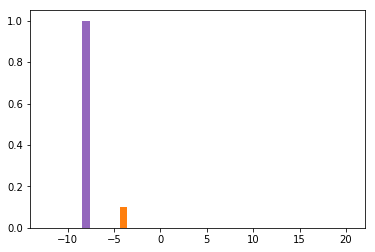

In [24]:
### Robustness checks: focus on big negative mean estimates 
sim_bins_data = SCE_bins
print(str(sum(IndSCE_pk['IncMean']<-6))+' abnormals')
ct=0
figure=plt.plot()
for id in IndSCE_pk.index[IndSCE_pk['IncMean']<-8]:
    print(id)
    print(IndSCE_pk['IncMean'][id])
    sim_probs_data= np.flip(np.array([IndSCE['Q24_bin'+str(n)][id]/100 for n in range(1,11)]))
    plt.bar(sim_bins_data[1:],sim_probs_data)
    print(sim_probs_data)
    stats_est=SynDensityStat(SCE_bins,sim_probs_data)
    print(stats_est['mean'])